# Different orthotropic fitted closure approximations in simple shear flow.

Model should reproduce Figure 6(a) in
Du Hwan Chung and Tai Hun Kwon (2001),
'Improved model of orthotropic closure approximation for flow induced fiber
orientation', Polymer Composites, 22(5), 636-649, DOI: 10.1002/pc.10566

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from fiberoripy.orientation import folgar_tucker_ode

In [2]:
# geometric factor
xi = 1.0

# phenomenological fiber-fiber interaction coefficient
C_I = 0.01

# time steps
t = np.linspace(0, 30, 60)

# initial fiber orientation state
A0 = 1.0 / 3.0 * np.eye(3)

In [3]:
# define a function that describes the (time-dependend) velocity gradient
def L(t):
    """Velocity gradient."""
    return np.array([[0.0, 1.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])

In [5]:
# compute solutions by integrating the ODEs
a_ibof = odeint(
    folgar_tucker_ode,
    A0.ravel(),
    t,
    args=(xi, L, C_I, "HYBRID"),
)
a_orf = odeint(
    folgar_tucker_ode,
    A0.ravel(),
    t,
    args=(xi, L, C_I, "ORF"),
)
a_orw = odeint(
    folgar_tucker_ode,
    A0.ravel(),
    t,
    args=(xi, L, C_I, "ORW"),
)
a_orw3 = odeint(
    folgar_tucker_ode,
    A0.ravel(),
    t,
    args=(xi, L, C_I, "ORW3"),
)

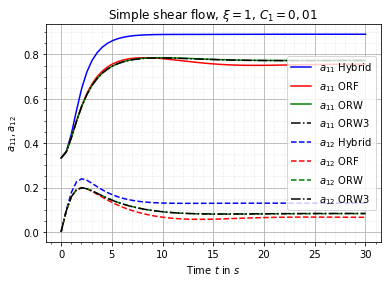

In [6]:
# plot components
plt.plot(t, a_ibof[:, 0], linestyle="-", label="$a_{11}$ Hybrid", color="b")
plt.plot(t, a_orf[:, 0], linestyle="-", label="$a_{11}$ ORF", color="r")
plt.plot(t, a_orw[:, 0], linestyle="-", label="$a_{11}$ ORW", color="g")
plt.plot(t, a_orw3[:, 0], linestyle="-.", label="$a_{11}$ ORW3", color="k")

plt.plot(t, a_ibof[:, 1], linestyle="--", label="$a_{12}$ Hybrid", color="b")
plt.plot(t, a_orf[:, 1], linestyle="--", label="$a_{12}$ ORF", color="r")
plt.plot(t, a_orw[:, 1], linestyle="--", label="$a_{12}$ ORW", color="g")
plt.plot(t, a_orw3[:, 1], linestyle="-.", label="$a_{12}$ ORW3", color="k")

# adjust some plot settings.
plt.ylim=([-0.2, 1])
plt.grid(b=True, which="major", linestyle="-")
plt.minorticks_on()
plt.grid(b=True, which="minor", linestyle="--", alpha=0.2)
plt.xlabel("Time $t$ in $s$")
plt.ylabel("$a_{11}, a_{12}$")
plt.legend(loc="center right")
plt.title(r"Simple shear flow, $\xi = 1$, $C_1 = 0,01$")
plt.show()